<a href="https://colab.research.google.com/github/jshiu004/ImposterSyndromeAnalysis/blob/main/CS105_Mini_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 105 Mini-Project
By: Dmitry Sorokin, Kyle Chahal, Justin Shiu, Justin An

Importing packages

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import scipy.stats as st
import seaborn as sns

#makes visualizations neater
import warnings
warnings.filterwarnings('ignore')

The data we have comes from a survey that was sent out during the Winter 2025 quarter to UCR students in at least one of the following classes: CS 010A, CS 010C, CS111, CS 105, and CS 167. After collecting all of the data, we seperate it to only include certain variables which include GPA, age, major, information on the student's confidence in their coding abilities, and the student's thoughts on wether or not they are affected by imposter syndrome.

In [ ]:
# @title
full_data = pd.read_csv('sample_data/fullData.csv')

selected_data = full_data.loc[:,["What is your age? Answer with a number only.", "What is your current class standing?", "What is your major/minor? (If your major is not listed, please write it in \"Other..\")", "What is your current cumulative GPA?", "How often do you arrive late to lecture in a week?", "How often do you attend TA/professor office hours?", "Rank your preferred methods for seeking clarification from the professor on course material:  [In-person after lecture]", "Rank your preferred methods for seeking clarification from the professor on course material:  [In-person at their office hours]","How far is your commute to UCR (in miles)? Answer with a number only. ", "Rank your preferred methods for seeking clarification from the professor on course material:  [Email]", "Rank your preferred methods for seeking clarification from the professor on course material:  [Slack/Discord/Pizza (DMs or forums)]", "Do you believe that you suffer from imposter syndrome?", "Indicate how accurately the following statements about coding apply to you: [The code/programs I produce are exceptional]", "Indicate how accurately the following statements about coding apply to you: [I am very comfortable with programming/writing code.]", "Indicate how accurately the following statements about coding apply to you: [I enjoy coding in an academic setting.]", "Indicate how accurately the following statements about coding apply to you: [I enjoy coding outside of an academic setting.]", "Indicate how accurately the following statements about coding apply to you: [I often feel discouraged when coding.]", "Given the following scenario, what would you do?: You are coding in a language you are  inexperienced in but generally understand. You then need to use a function that you know the name of, but do not know the syntax for.", "How often do you feel anxious when working on programming assignments?", "How much does your GPA matter to you? Choose the option that applies to you the most."]]

After filtering the data to only contian those variables that we are interested in, we proceed to clean the data.

In [ ]:
# @title
#removing the first row, since it has bad data
selected_data = selected_data.iloc[1:,:]

#cleaning selected_data: "I'm not sure" for Imposter Syndrome
selected_data = selected_data[(selected_data["Do you believe that you suffer from imposter syndrome?"] != "I'm not sure")]


With this data, we hope to figure out if there is a correlation between a student's confidence in their coding abilities to how much they are influenced by imposter syndrome.
For our tests, we will choose our alpha, or our significance level, to be 0.05.

To start, we will look into the variables we are interested in and determine wether or not they are independent of one-another.

In [ ]:
# @title
# Define relevant columns with original names
original_columns = [
    "Indicate how accurately the following statements about coding apply to you: [The code/programs I produce are exceptional]",
    "Indicate how accurately the following statements about coding apply to you: [I am very comfortable with programming/writing code.]",
    "Indicate how accurately the following statements about coding apply to you: [I often feel discouraged when coding.]",
    "Do you believe that you suffer from imposter syndrome?",
    "How often do you feel anxious when working on programming assignments?"
]

# Select relevant columns
selected_data_copy = selected_data.loc[:, original_columns]

# Remove invalid data
selected_data_copy = selected_data_copy[selected_data_copy["Do you believe that you suffer from imposter syndrome?"] != "I'm not sure"]

# Define mappings for categorical responses
likert_scale = {
    "1 (not true)": 1,
    "2 (somewhat false)": 2,
    "3 (neutral)": 3,
    "4 (somewhat true)": 4,
    "5 (true)": 5
}

frequency_scale = {
    "Never": 1,
    "Rarely": 2,
    "Sometimes": 3,
    "Often": 4,
    "Always": 5
}

imposter_syndrome_map = {
    "Not at all": 1,
    "Somewhat": 2,
    "Moderately": 3,
    "Strongly": 4,
    "Very strongly": 5
}

# Apply mappings to all relevant columns
for col in selected_data_copy.columns:
    if col == "Do you believe that you suffer from imposter syndrome?":
        selected_data_copy[col] = selected_data_copy[col].map(imposter_syndrome_map)
    elif col == "How often do you feel anxious when working on programming assignments?":
        selected_data_copy[col] = selected_data_copy[col].map(frequency_scale)
    else:
        selected_data_copy[col] = selected_data_copy[col].map(likert_scale)

# Rename columns for better readability
column_rename_map = {
    "Indicate how accurately the following statements about coding apply to you: [The code/programs I produce are exceptional]": "Code Confidence",
    "Indicate how accurately the following statements about coding apply to you: [I am very comfortable with programming/writing code.]": "Comfort with Coding",
    "Indicate how accurately the following statements about coding apply to you: [I often feel discouraged when coding.]": "Coding Discouragement",
    "Do you believe that you suffer from imposter syndrome?": "Imposter Syndrome",
    "How often do you feel anxious when working on programming assignments?": "Anxiety with Assignments"
}

selected_data_copy.rename(columns=column_rename_map, inplace=True)

#making plot
pio.renderers.default = "colab"

# Create the parallel coordinates plot with renamed columns
fig = px.parallel_coordinates(
    selected_data_copy,
    dimensions=selected_data_copy.columns,
    color="Imposter Syndrome",
    color_continuous_scale=px.colors.sequential.Plasma
)
fig.update_layout(
  width=800
)
fig.show()


In this parallel coordinates plot we have plotted many of the variables that we are interested in. One thing that we observed is that many of the lines connecting from the comfort with coding column are yellow which indicate a high feeling of imposter syndrome. This tells us that regardless of students comfort with coding there are always people that feel high feelings of imposter syndrome. Therefore there is no relationship that we can draw between the two variables. The fact that we cannot notice a visible relationship between any of the variable columns gives us the conclusion that the variables are independent of eachother and do not show any effect on the level of imposter syndrome that students feel.

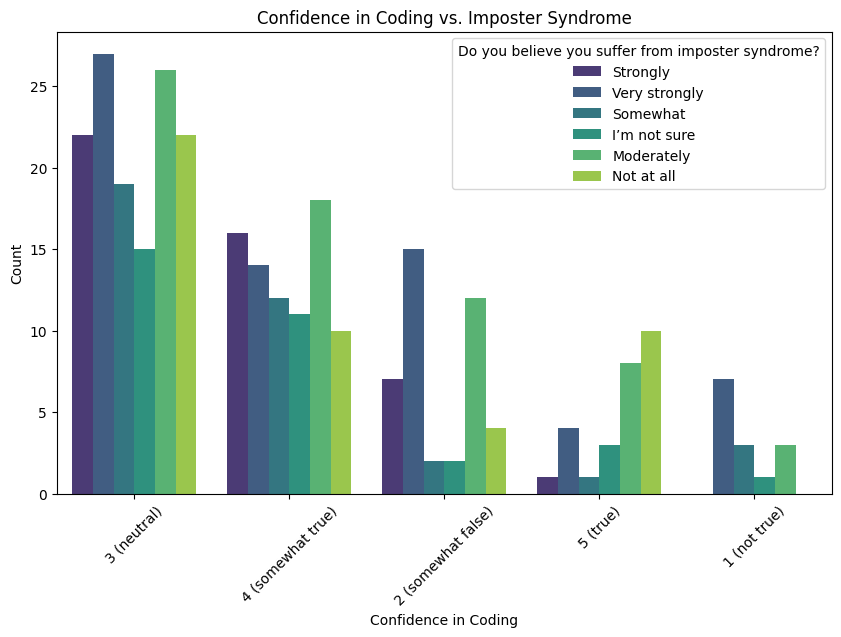

In [ ]:
# @title
# Selecting relevant columns
selected_data_copy = selected_data.loc[:, [
    "Indicate how accurately the following statements about coding apply to you: [I am very comfortable with programming/writing code.]",
    "Do you believe that you suffer from imposter syndrome?"
]]

# Renaming columns for easier access
selected_data_copy.columns = ["Confidence in Coding", "Imposter Syndrome"]

# Creating the stacked bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=selected_data_copy, x="Confidence in Coding", hue="Imposter Syndrome", palette="viridis")

# Customizing the plot
plt.xticks(rotation=45)
plt.xlabel("Confidence in Coding")
plt.ylabel("Count")
plt.title("Confidence in Coding vs. Imposter Syndrome")
plt.legend(title="Do you believe you suffer from imposter syndrome?")
correlation, p_value = st.spearmanr(selected_data_copy["Confidence in Coding"], selected_data_copy['Imposter Syndrome'])

# Show the plot
plt.show()


We used this plot for EDA because we were curious on how confidence in coding was related to feelings of imposter syndrome. We found that among people that were most confident in their coding abilities (an answer of 5) a most of those people did not feel any imposter syndrome at all.


**Hypothesis 1:** We believe that there is some dependence between a student's GPA and how strongly experience imposter sundrome.To test this we will be performing a chi square test between the groups of gpa ranges and the groups of occurance of imposter syndrome that one experiences.

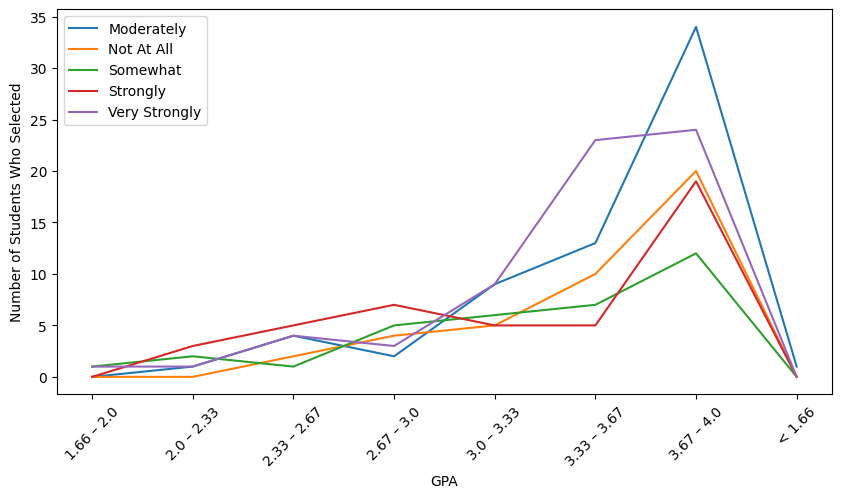

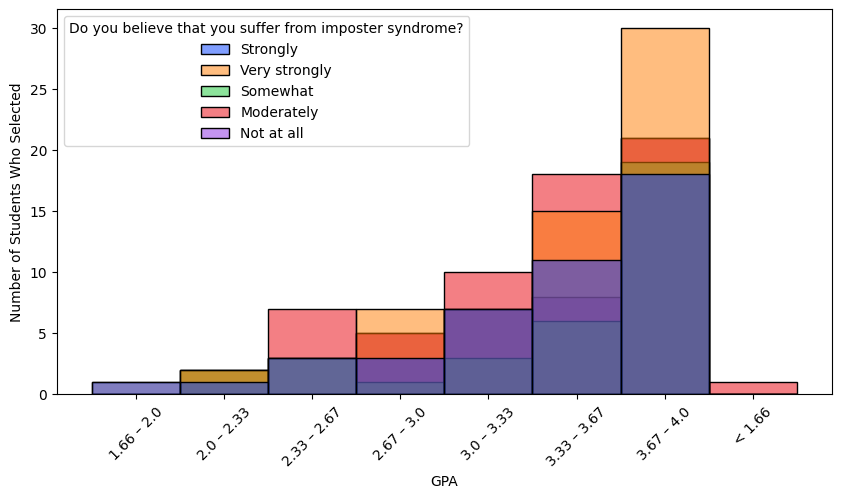

Correlation: -0.12068610952838135
p-value: 0.05770823578532213


In [ ]:
# @title
# Define relevant columns
gpa_column = "What is your current cumulative GPA?"
imposter_column = "Do you believe that you suffer from imposter syndrome?"

# Extract and clean relevant data
selected_data_copy = selected_data[[gpa_column, imposter_column]].dropna()
cleaned_data = selected_data_copy[(selected_data_copy[gpa_column] != "Prefer not to say") & (selected_data_copy[gpa_column] != " ")]
cleaned_data = cleaned_data[cleaned_data[imposter_column] != "I’m not sure"]

# Create a contingency table
contingency_table = pd.crosstab(cleaned_data[gpa_column], cleaned_data[imposter_column])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
value1 = contingency_table.iloc[:,0]
value2 = contingency_table.iloc[:,1]
value3 = contingency_table.iloc[:,2]
value4 = contingency_table.iloc[:,3]
value5 = contingency_table.iloc[:,4]
plt.figure(figsize=(10, 5))
plt.plot(value1, label = "Moderately")
plt.plot(value2, label = "Not At All")
plt.plot(value3, label = "Somewhat")
plt.plot(value4, label = "Strongly")
plt.plot(value5, label = "Very Strongly")
plt.xlabel("GPA")
plt.ylabel("Number of Students Who Selected")
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=cleaned_data, x=sorted(cleaned_data[gpa_column]), hue=imposter_column, bins=10, palette="bright")
plt.xticks(rotation=45)
plt.ylabel("Number of Students Who Selected")
plt.xlabel("GPA")
plt.show()
# Print results
correlation, p_value = st.spearmanr(cleaned_data[gpa_column], cleaned_data[imposter_column])
print(f"Correlation: {correlation}")
print(f"p-value: {p_value}")



Based on this Spearman Rank Correlation test we can see the correlation value that we calculated is small and in the negatives, which shows that the variables have a very weak correlation. We can also see the p-value is greater than that of 0.05, which leads us to the conclusion that we fail to reject the null hypothesis and conclude that gpa range is independent of feelings of imposter syndrome in the classes that were surveyed.



**Hypothesis 2:** We are trying to find out if there is any correlation between age of a student and how often one feels they experience imposter syndrome. To test this we will be doing correlational analysis using the correlational coefficient and we will be showing the relatonship using a heat map.

Correlation: 0.05741753052063352


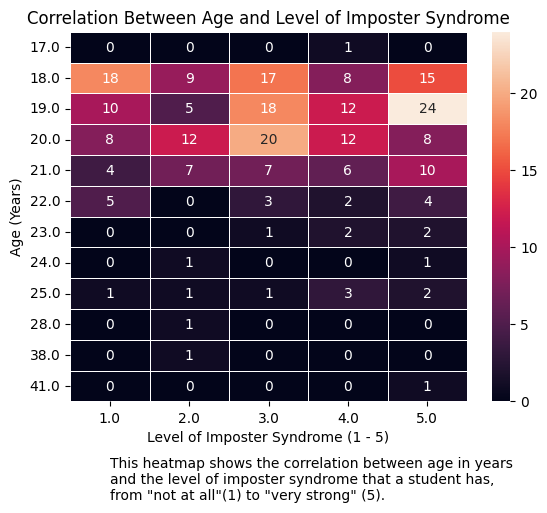

In [ ]:
# @title
# Define relevant columns
age_column = "What is your age? Answer with a number only."
imposter_column = "Do you believe that you suffer from imposter syndrome?"

# Convert age to numeric if necessary
selected_data_copy = selected_data[[age_column, imposter_column]]
selected_data_copy[age_column] = pd.to_numeric(selected_data_copy[age_column], errors='coerce')

# Map imposter syndrome responses to numeric values
imposter_mapping = {
    "Not at all": 1,
    "Somewhat": 2,
    "Moderately": 3,
    "Strongly": 4,
    "Very strongly": 5
}
selected_data_copy["imposter_numeric"] = selected_data_copy[imposter_column].map(imposter_mapping)

# Drop NaN values
filtered_data = selected_data_copy.dropna(subset=[age_column, "imposter_numeric"])

# Compute correlation
correlation = filtered_data[age_column].corr(filtered_data["imposter_numeric"])
print(f"Correlation: {correlation}")

# Plot scatter plot

data = pd.crosstab(filtered_data[age_column], filtered_data["imposter_numeric"])
sns.heatmap(data, annot = True, linewidths=0.5, linecolor='white').set(xlabel = "Level of Imposter Syndrome (1 - 5)", ylabel = "Age (Years)", title = "Correlation Between Age and Level of Imposter Syndrome")
plt.text(x = 0.5,y = 15.2,s = "This heatmap shows the correlation between age in years \nand the level of imposter syndrome that a student has, \nfrom \"not at all\"(1) to \"very strong\" (5).")
plt.show()


We can see that we calculated a correlational coefficient of 0.0574. Since this value is very close to 0, we can conclude that there is little to no correlation between age and levels of feelings of imposter syndrome in the classes that were surveyed. Furthermore, from the heat map we can see that the most frequent category for the data is students who are 24 years old and have very strong feelings of imposter syndrome. We can also see that a lot of the students seem to think they moderately suffer from imposter syndrome, with a close second being very strongly.

Now, we want to explore to see if those student's who think their code is exceptional suffer less from imposter syndrome.


**Hypothesis 3:** We believe that a student's thought on how exceptional their code is negatively correlated with their level of imposter syndrome and we believe that the studen't comfortability writing code also has a negative correlation with imposter syndrome.

In [ ]:
# @title
# Define relevant columns
exceptional_code = "Indicate how accurately the following statements about coding apply to you: [The code/programs I produce are exceptional]"
confidence_in_code = "Indicate how accurately the following statements about coding apply to you: [I am very comfortable with programming/writing code.]"

imposter_column ="Do you believe that you suffer from imposter syndrome?"

selected_data_copy = selected_data[[exceptional_code, confidence_in_code, imposter_column]]
# Create a contingency table
contingency_table_excep = pd.crosstab(selected_data_copy[exceptional_code], selected_data_copy[imposter_column])
contingency_table_conf = pd.crosstab(selected_data_copy[confidence_in_code], selected_data_copy[imposter_column])

# Perform Chi-Square test
chi2_stat_e, p_value_e, dof_e, expected = chi2_contingency(contingency_table_excep)
chi2_stat_c, p_value_c, dof_c, expected_c = chi2_contingency(contingency_table_conf)

# Print results
print("Chi-Square Test Results for exceptional code:")
print(f"Chi-Square Statistic: {chi2_stat_e}")
print(f"p-value: {p_value_e}")
print(f"Degrees of Freedom: {dof_e}")
print()
print("Chi-Square Test Results for comfortability coding:")
print(f"Chi-Square Statistic: {chi2_stat_c}")
print(f"p-value: {p_value_c}")
print(f"Degrees of Freedom: {dof_c}")
print()


imposter_mapping = {
    "Not at all": 1,
    "Somewhat": 2,
    "Moderately": 3,
    "Strongly": 4,
    "Very strongly": 5
}

excep_and_conf_map = {
    "1 (not true)": 1,
    "2 (somewhat false)": 2,
    "3 (neutral)": 3,
    "4 (somewhat true)": 4,
    "5 (true)": 5
}

selected_data_copy["imposter_numeric"] = selected_data_copy[imposter_column].map(imposter_mapping)
selected_data_copy["exceptional_numeric"] = selected_data_copy[exceptional_code].map(excep_and_conf_map)
selected_data_copy["confidence_numeric"] = selected_data_copy[confidence_in_code].map(excep_and_conf_map)
selected_data_copy = selected_data_copy.dropna(subset=["exceptional_numeric", "confidence_numeric", "imposter_numeric"])


#finding correlation:
correlation_excep = selected_data_copy["exceptional_numeric"].corr(selected_data_copy["imposter_numeric"])
correlation_conf = selected_data_copy["confidence_numeric"].corr(selected_data_copy["imposter_numeric"])

print("Finding correlation for exceptional code and imposter syndrome:")
print(f"Correlation: {correlation_excep}")
print()
print("Finding correlation for confidence in coding and imposter syndrome:")
print(f"Correlation: {correlation_conf}")


Chi-Square Test Results for exceptional code:
Chi-Square Statistic: 35.59732735843411
p-value: 0.01714416954918306
Degrees of Freedom: 20

Chi-Square Test Results for comfortability coding:
Chi-Square Statistic: 36.59937998633154
p-value: 0.013065001645190857
Degrees of Freedom: 20

Finding correlation for exceptional code and imposter syndrome:
Correlation: -0.1825630704713254

Finding correlation for confidence in coding and imposter syndrome:
Correlation: -0.19738870231551608


To test our hypothesis, we first found that both variables (exceptionality and comfortability) are independent of imposter syndrome, meaning we could now find if they were correlated. After running our tests, we can see that our hpothesis is incorrect. We found that both our variables on exceptional code and confidence in code had a fairly weak negative correlation with how much the student thought they were affected by impsoter syndrome. This mean that as either of the two variables increases, how much the student believes they are affected by imposter syndrome should change a negligible amounnt.

Some more interesting data to look into may be the levels of imposter syndrome between students with CS and DS related majors and those students that are in different fields.
For the purposes of this test, we will classify students into the CS and DS related fields group if for their major they put one of the following: "Data Science major", "CS major", "CSBA major", "CS or DS major", "Physics, double major with DS", "Physics and Computer Science with a minor in math (double major)", or "CS or DS minor".

In [ ]:
# @title
major_column = 'What is your major/minor? (If your major is not listed, please write it in "Other..")'
imposter_column = 'Do you believe that you suffer from imposter syndrome?'

filtered_data = selected_data[[major_column, imposter_column]]

CS_DS_data = filtered_data[(filtered_data[major_column] == "Data Science major") | (filtered_data[major_column] == "CS major") | (filtered_data[major_column] == "CSBA major") | (filtered_data[major_column] == "CS or DS major") | (filtered_data[major_column] == 'Physics, double major with DS') | (filtered_data[major_column] == "Physics and Computer Science with a minor in math (double major)") | (filtered_data[major_column] == "CS or DS minor") ]
CS_DS_data[major_column].unique()

not_CS_DS_data = filtered_data[(filtered_data[major_column] != "Data Science major") & (filtered_data[major_column] != "CS major") & (filtered_data[major_column] != "CSBA major") & (filtered_data[major_column] != "CS or DS major") & (filtered_data[major_column] != 'Physics, double major with DS') & (filtered_data[major_column] != "Physics and Computer Science with a minor in math (double major)") & (filtered_data[major_column] != "CS or DS minor")]
not_CS_DS_data[major_column].unique()

imposter_syndrome_map = {
    "Not at all": 1,
    "Somewhat": 2,
    "Moderately": 3,
    "Strongly": 4,
    "Very strongly": 5
}

# Apply mappings
# Mapping CS_DS_data:
CS_DS_data.loc[CS_DS_data[imposter_column] == "Not at all", "imposter_map"] = 1
CS_DS_data.loc[CS_DS_data[imposter_column] == "Somewhat", "imposter_map"] = 2
CS_DS_data.loc[CS_DS_data[imposter_column] == "Moderately", "imposter_map"] = 3
CS_DS_data.loc[CS_DS_data[imposter_column] == "Strongly", "imposter_map"] = 4
CS_DS_data.loc[CS_DS_data[imposter_column] == "Very strongly", "imposter_map"] = 5
# Mapping not_CS_DS_data
not_CS_DS_data.loc[not_CS_DS_data[imposter_column] == "Not at all", "imposter_map"] = 1
not_CS_DS_data.loc[not_CS_DS_data[imposter_column] == "Somewhat", "imposter_map"] = 2
not_CS_DS_data.loc[not_CS_DS_data[imposter_column] == "Moderately", "imposter_map"] = 3
not_CS_DS_data.loc[not_CS_DS_data[imposter_column] == "Strongly", "imposter_map"] = 4
not_CS_DS_data.loc[not_CS_DS_data[imposter_column] == "Very strongly", "imposter_map"] = 5

CS_DS_data = CS_DS_data.dropna(subset='imposter_map')
not_CS_DS_data = not_CS_DS_data.dropna(subset='imposter_map')

import plotly.graph_objects as go

categories = ['Not at all','Somewhat','Moderately','Strongly','Very strongly']

fig = go.Figure()

percentage_CS_DS_notAtAll = (len(CS_DS_data[CS_DS_data["imposter_map"] == 1]) / len(CS_DS_data) ) * 100
percentage_CS_DS_somewhat = (len(CS_DS_data[CS_DS_data["imposter_map"] == 2]) / len(CS_DS_data)) * 100
percentage_CS_DS_moderately = (len(CS_DS_data[CS_DS_data["imposter_map"] == 3]) / len(CS_DS_data)) * 100
percentage_CS_DS_strongly = (len(CS_DS_data[CS_DS_data["imposter_map"] == 4]) / len(CS_DS_data)) * 100
percentage_CS_DS_V_strongly = (len(CS_DS_data[CS_DS_data["imposter_map"] == 5]) / len(CS_DS_data)) * 100

percentage_not_CS_DS_notAtAll = (len(not_CS_DS_data[not_CS_DS_data["imposter_map"] == 1]) / len(not_CS_DS_data) ) * 100
percentage_not_CS_DS_somewhat = (len(not_CS_DS_data[not_CS_DS_data["imposter_map"] == 2]) / len(not_CS_DS_data)) * 100
percentage_not_CS_DS_moderately = (len(not_CS_DS_data[not_CS_DS_data["imposter_map"] == 3]) / len(not_CS_DS_data)) * 100
percentage_not_CS_DS_strongly = (len(not_CS_DS_data[not_CS_DS_data["imposter_map"] == 4]) / len(not_CS_DS_data)) * 100
percentage_not_CS_DS_V_strongly = (len(not_CS_DS_data[not_CS_DS_data["imposter_map"] == 5]) / len(not_CS_DS_data)) * 100


fig.add_trace(
    go.Scatterpolar(
      r = [percentage_CS_DS_notAtAll, percentage_CS_DS_somewhat, percentage_CS_DS_moderately, percentage_CS_DS_strongly, percentage_CS_DS_V_strongly],
      theta = categories,
      fill = 'toself',
      name = 'CS and DS majors'
))

fig.add_trace(
    go.Scatterpolar(
      r = [percentage_not_CS_DS_notAtAll, percentage_not_CS_DS_somewhat, percentage_not_CS_DS_moderately, percentage_not_CS_DS_strongly, percentage_not_CS_DS_V_strongly],
      theta = categories,
      fill = 'toself',
      name = 'Not CS or DS majors'
))

fig.update_layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 30]
    )),
  width=750,
  showlegend = True
)

fig.show()


As seen by the Spider plot above, CS and DS related majors seem to think that they suffer more from imposter syndrome than non CS or DS related ones. CS and DS majors lead in the "Strongly" and "Moderately" categories. Meanwhile, the non CS or DS related majors lead in the "Not at all" and "Somewhat" categories. In the "Very strongly" category, they are about the same with non CS or DS majors having a slight lead.

Now lets take a look at the relationship between student's preference on seeking clarification from the professor and how much they think they suffer from imposter syndrome. For this test, I will specifically be looking at several subsets of data (categorized by which method of clarification they prefer), each of which contains only those student's that said that method was their most preferred or second most preferred. Then, similarly to the last spider chart, I will compare that to what the student put down as their thought on the impact of imposter syndrome.

In [ ]:
# @title
in_person = 'Rank your preferred methods for seeking clarification from the professor on course material:  [In-person after lecture]'
office_hours = 'Rank your preferred methods for seeking clarification from the professor on course material:  [In-person at their office hours]'
email = 'Rank your preferred methods for seeking clarification from the professor on course material:  [Email]'
DM = 'Rank your preferred methods for seeking clarification from the professor on course material:  [Slack/Discord/Pizza (DMs or forums)]'
imposter_column = 'Do you believe that you suffer from imposter syndrome?'

clarification_data = selected_data[[in_person, office_hours, email, DM, imposter_column]]

imposter_syndrome_map = {
    "Not at all": 1,
    "Somewhat": 2,
    "Moderately": 3,
    "Strongly": 4,
    "Very strongly": 5
}

clarification_map = {
    "Not applicable (I never ask)": 0,
    "1 (not preferred)": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5 (most preferred)": 5
}

#mapping imposter data to a new column called "imposter_map"
clarification_data.loc[clarification_data[imposter_column] == "Not at all", "imposter_map"] = 1
clarification_data.loc[clarification_data[imposter_column] == "Somewhat", "imposter_map"] = 2
clarification_data.loc[clarification_data[imposter_column] == "Moderately", "imposter_map"] = 3
clarification_data.loc[clarification_data[imposter_column] == "Strongly", "imposter_map"] = 4
clarification_data.loc[clarification_data[imposter_column] == "Very strongly", "imposter_map"] = 5

#mapping in_person data to a new column called "in_person_map"
clarification_data.loc[clarification_data[in_person] == "Not applicable (I never ask)", "in_person_map"] = 0
clarification_data.loc[clarification_data[in_person] == "1 (not preferred)", "in_person_map"] = 1
clarification_data.loc[clarification_data[in_person] == "2", "in_person_map"] = 2
clarification_data.loc[clarification_data[in_person] == "3", "in_person_map"] = 3
clarification_data.loc[clarification_data[in_person] == "4", "in_person_map"] = 4
clarification_data.loc[clarification_data[in_person] == "5 (most preferred)", "in_person_map"] = 5

#mapping office_hours data to a new column called "office_hours_map"
clarification_data.loc[clarification_data[office_hours] == "Not applicable (I never ask)", "office_hours_map"] = 0
clarification_data.loc[clarification_data[office_hours] == "1 (not preferred)", "office_hours_map"] = 1
clarification_data.loc[clarification_data[office_hours] == "2", "office_hours_map"] = 2
clarification_data.loc[clarification_data[office_hours] == "3", "office_hours_map"] = 3
clarification_data.loc[clarification_data[office_hours] == "4", "office_hours_map"] = 4
clarification_data.loc[clarification_data[office_hours] == "5 (most preferred)", "office_hours_map"] = 5

#mapping email data to a new column called "email_map"
clarification_data.loc[clarification_data[email] == "Not applicable (I never ask)", "email_map"] = 0
clarification_data.loc[clarification_data[email] == "1 (not preferred)", "email_map"] = 1
clarification_data.loc[clarification_data[email] == "2", "email_map"] = 2
clarification_data.loc[clarification_data[email] == "3", "email_map"] = 3
clarification_data.loc[clarification_data[email] == "4", "email_map"] = 4
clarification_data.loc[clarification_data[email] == "5 (most preferred)", "email_map"] = 5

#mapping DM data to a new column called "DM_map"
clarification_data.loc[clarification_data[DM] == "Not applicable (I never ask)", "DM_map"] = 0
clarification_data.loc[clarification_data[DM] == "1 (not preferred)", "DM_map"] = 1
clarification_data.loc[clarification_data[DM] == "2", "DM_map"] = 2
clarification_data.loc[clarification_data[DM] == "3", "DM_map"] = 3
clarification_data.loc[clarification_data[DM] == "4", "DM_map"] = 4
clarification_data.loc[clarification_data[DM] == "5 (most preferred)", "DM_map"] = 5

#just in case cleaning up the data
clarification_data = clarification_data.dropna(subset='imposter_map')

#separating data
in_person_data = clarification_data.loc[:,["in_person_map", "imposter_map"]]
office_hours_data = clarification_data.loc[:,["office_hours_map", "imposter_map"]]
email_data = clarification_data.loc[:,["email_map", "imposter_map"]]
DM_data = clarification_data.loc[:,["DM_map", "imposter_map"]]


#Finding percentages for all of the data

P_DM_I = DM_data[(DM_data["DM_map"] == 4) | (DM_data["DM_map"] == 5)]
P_email_I = email_data[(email_data["email_map"] == 4) | (email_data["email_map"] == 5)]
P_office_hours_I = office_hours_data[(office_hours_data["office_hours_map"] == 4) | (office_hours_data["office_hours_map"] == 5)]
P_in_person_I = in_person_data[(in_person_data["in_person_map"] == 4) | (in_person_data["in_person_map"] == 5)]

P_DM_notAtAll = (len(P_DM_I[P_DM_I["imposter_map"] == 1]) / len(P_DM_I) ) * 100
P_DM_somewhat = (len(P_DM_I[P_DM_I["imposter_map"] == 2]) / len(P_DM_I)) * 100
P_DM_moderately = (len(P_DM_I[P_DM_I["imposter_map"] == 3]) / len(P_DM_I)) * 100
P_DM_strongly = (len(P_DM_I[P_DM_I["imposter_map"] == 4]) / len(P_DM_I)) * 100
P_DM_V_strongly = (len(P_DM_I[P_DM_I["imposter_map"] == 5]) / len(P_DM_I)) * 100

P_email_notAtAll = (len(P_email_I[P_email_I["imposter_map"] == 1]) / len(P_email_I) ) * 100
P_email_somewhat = (len(P_email_I[P_email_I["imposter_map"] == 2]) / len(P_email_I)) * 100
P_email_moderately = (len(P_email_I[P_email_I["imposter_map"] == 3]) / len(P_email_I)) * 100
P_email_strongly = (len(P_email_I[P_email_I["imposter_map"] == 4]) / len(P_email_I)) * 100
P_email_V_strongly = (len(P_email_I[P_email_I["imposter_map"] == 5]) / len(P_email_I)) * 100

P_office_hours_notAtAll = (len(P_office_hours_I[P_office_hours_I["imposter_map"] == 1]) / len(P_office_hours_I) ) * 100
P_office_hours_somewhat = (len(P_office_hours_I[P_office_hours_I["imposter_map"] == 2]) / len(P_office_hours_I)) * 100
P_office_hours_moderately = (len(P_office_hours_I[P_office_hours_I["imposter_map"] == 3]) / len(P_office_hours_I)) * 100
P_office_hours_strongly = (len(P_office_hours_I[P_office_hours_I["imposter_map"] == 4]) / len(P_office_hours_I)) * 100
P_office_hours_V_strongly = (len(P_office_hours_I[P_office_hours_I["imposter_map"] == 5]) / len(P_office_hours_I)) * 100

P_in_person_notAtAll = (len(P_in_person_I[P_in_person_I["imposter_map"] == 1]) / len(P_in_person_I) ) * 100
P_in_person_somewhat = (len(P_in_person_I[P_in_person_I["imposter_map"] == 2]) / len(P_in_person_I)) * 100
P_in_person_moderately = (len(P_in_person_I[P_in_person_I["imposter_map"] == 3]) / len(P_in_person_I)) * 100
P_in_person_strongly = (len(P_in_person_I[P_in_person_I["imposter_map"] == 4]) / len(P_in_person_I)) * 100
P_in_person_V_strongly = (len(P_in_person_I[P_in_person_I["imposter_map"] == 5]) / len(P_in_person_I)) * 100


#print(P_DM_NA + P_DM_notPreferred + P_DM_2 + P_DM_3 + P_DM_4 + P_DM_mostPreferred)

import plotly.graph_objects as go

categories = ['Not at all','Somewhat','Moderately','Strongly','Very strongly']

fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
      r = [P_DM_notAtAll, P_DM_somewhat, P_DM_moderately, P_DM_strongly, P_DM_V_strongly],
      theta = categories,
      fill = 'toself',
      name = 'DM'
))

fig.add_trace(
    go.Scatterpolar(
      r = [P_email_notAtAll, P_email_somewhat, P_email_moderately, P_email_strongly, P_email_V_strongly],
      theta = categories,
      fill = 'toself',
      name = 'Email'
))

fig.add_trace(
    go.Scatterpolar(
      r = [P_office_hours_notAtAll, P_office_hours_somewhat, P_office_hours_moderately, P_office_hours_strongly, P_office_hours_V_strongly],
      theta = categories,
      fill = 'toself',
      name = 'Office Hours'
))

fig.add_trace(
    go.Scatterpolar(
      r = [P_in_person_notAtAll, P_in_person_somewhat, P_in_person_moderately, P_in_person_strongly, P_in_person_V_strongly],
      theta = categories,
      fill = 'toself',
      name = 'In Person'
))

fig.update_layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 35]
    )),
  width=750,
  showlegend = True
)

As it turns out, most of the data looks relatively similar between the groups. There is a lot of overlap between the groups with some groups exceeding the overlap in certain areas. We can see that the group that prefered Direct Messaging has more people that think they suffer from imposter syndrome strongly, while the Office Hours group has more people that believe they only suffer moderately from imposter syndrome.

Now let's look to see if students in higher class standings experience more or less imposter syndrome than freshmen/sophomores

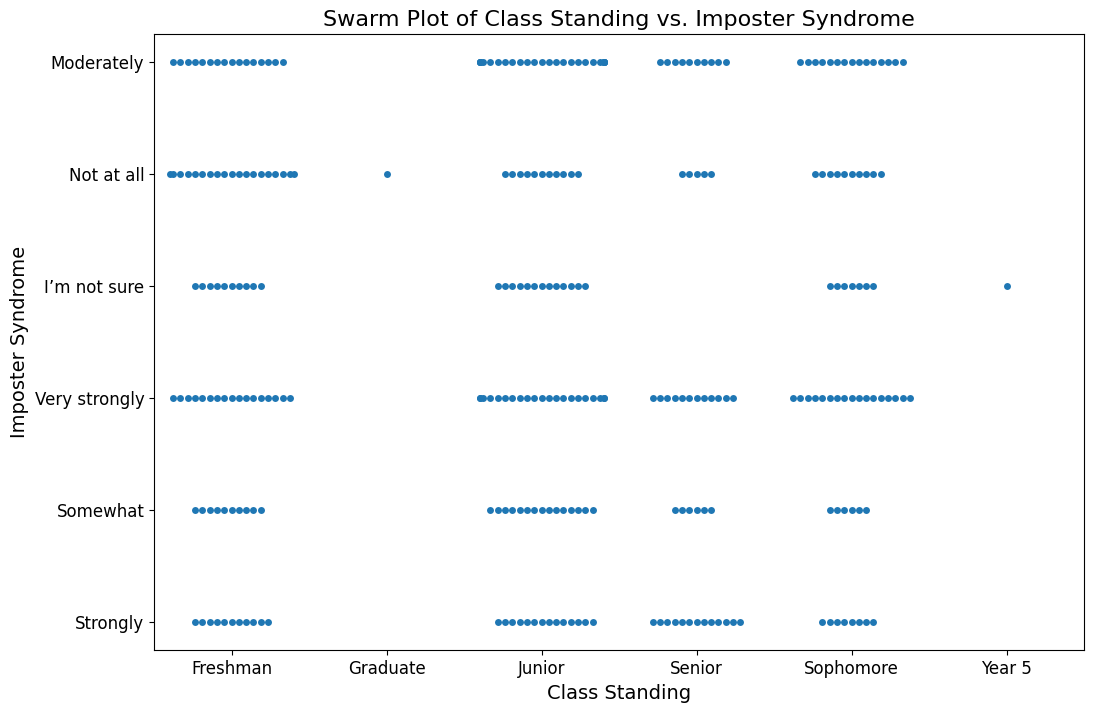

In [ ]:
# @title
#selecting relevalnt columns
selected_data_copy = selected_data[["What is your current class standing?", "Do you believe that you suffer from imposter syndrome?"]]
selected_data_copy.columns = ["Class Standing", "Imposter Syndrome"]

# Creating a swarm plot for better visualization
plt.figure(figsize=(12, 8), dpi=100)
sns.swarmplot(x="Class Standing", y="Imposter Syndrome", data=selected_data_copy, dodge=True)
plt.xlabel("Class Standing", fontsize=14)
plt.ylabel("Imposter Syndrome", fontsize=14)
plt.title("Swarm Plot of Class Standing vs. Imposter Syndrome", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


According to the swarm plot given:

General Trends:
- Across all class standings, imposter syndrome responses are distributed among multiple categories, but the majority of students report experiencing it at "Somewhat" or "Moderately."

- Higher class standings (Juniors and Seniors) seem to have more students reporting "Very Strongly".

Freshman & Sophomore Trends:
- Freshmen and sophomores have a relatively even distribution of responses.
- However, a large portion of freshmen (17 students) and sophomores (17 students) report experiencing imposter syndrome "Very Strongly."
- This shows that imposter syndrome is present early in students' academic careers.

Junior & Senior Trends:
- Juniors have the highest number of students in the "Very Strongly" category (21 students).
- Seniors also show a high number in the "Very Strongly" category (12 students), suggesting that feelings of imposter syndrome persist over time.
- However, there is also a noticeable number of seniors reporting "Not at all", indicating that some students may develop more confidence by their final year.

Graduate & Year 5 Students:
- The dataset contains very few graduate or fifth-year students, making it difficult to draw strong conclusions about their experiences.



Now we will see if there is a corrleation between commuters (over 5 miles) and Imposter Syndrome

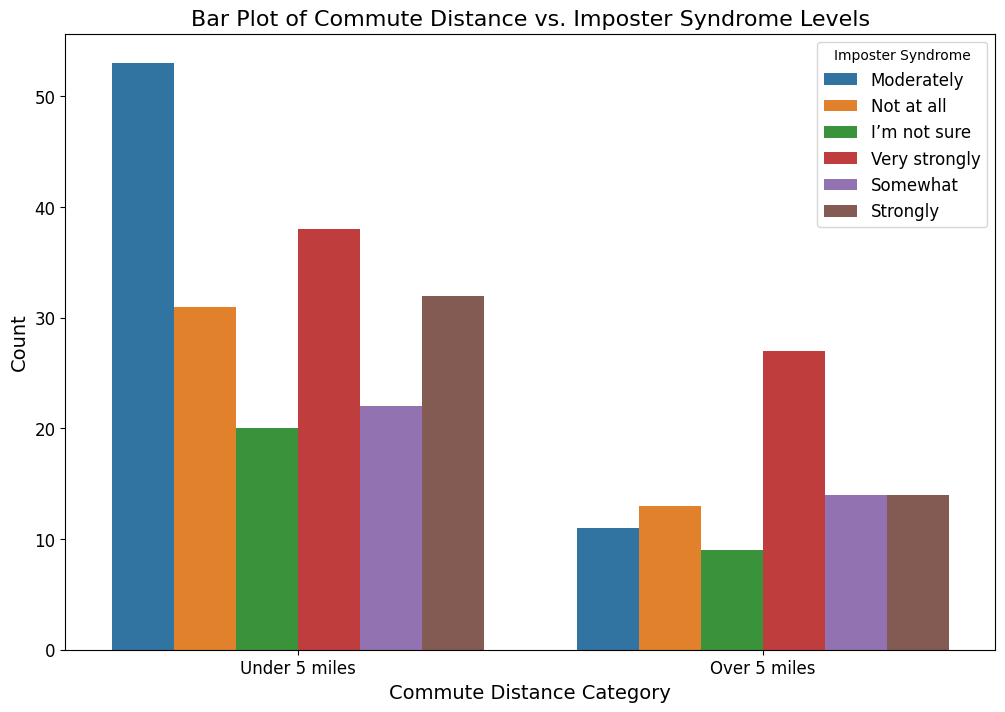

In [ ]:
# @title
selected_data_copy = selected_data[["How far is your commute to UCR (in miles)? Answer with a number only. ", "Do you believe that you suffer from imposter syndrome?"]]
selected_data_copy.columns = ["Commute Distance", "Imposter Syndrome"]

# Converting commute distance to numeric and categorizing into over/under 5 miles
selected_data_copy["Commute Distance"] = pd.to_numeric(selected_data_copy["Commute Distance"], errors='coerce')
selected_data_copy = selected_data_copy.dropna()
selected_data_copy["Commute Category"] = selected_data_copy["Commute Distance"].apply(lambda x: "Under 5 miles" if x <= 5 else "Over 5 miles")

# Creating a bar plot for visualization
plt.figure(figsize=(12, 8), dpi=100)
sns.countplot(x="Commute Category", hue="Imposter Syndrome", data=selected_data_copy)
plt.xlabel("Commute Distance Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Bar Plot of Commute Distance vs. Imposter Syndrome Levels", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Imposter Syndrome", fontsize=12)
plt.show()

In this bar graph, it seems there were more responses for non-commuters (less than 5 miles) than commuters (over 5 miles). Because of this, even though there were less people to feel "Very Strongly" on Imposter Syndrome for people that were commuting over 5 miles, it seems that there is a correlation to people that are commuting over 5 miles and Imposter Syndrome as their "Very Strongly" response was signficanlty the highest response for commuters over 5 miles while "Very Strongly" was not even close to being the highest response compared to "Moderately" for non-commuters (less than 5 miles).

# Conclusion


Throughout this project, we were aiming to explore the data to look into wether or not there is a correlation between a student's coding confidence and how strongly they suffer from imposter syndrome. Throughout this process, we have found that there is no visible correlation between these two variables in the data we have access to.

However, some interesting information that was found during Exploratory Data Analysis(EDA) was that those students who prefer to seek clarification from their professor via Direct Messanging seem to believe that they suffer strongly from imposter syndrome more than the other groups appear to believe. Another interesting discovery was evident between students who have a Computer Science or Data Science related major or minor and those students who do not. The Computer Science or Data Science related majors seem to believe that they suffer more from imposter syndrom than the non-related majors.

During our tests, we found that for Hypothesis 1, our hypothesis was incorrect as our tests gave us close to no correlation. Due to this result, we rejected our hypothesis which said that the two were correlated.

We also found that we were incorrect with our third hypothesis, where we found that a student's belief in their code's exceptionality and their confidence in their coding abilities have almost no correlation with how strongly the student believes they suffer from impsoter syndrome.

Overall, we were able to find answers to our hypotheses, and we found out some interesting information about the data that we had.